In [1]:
import os
# os.environ["CUDA_VISIBLE_DEVICES"] = ''
# os.environ['HF_HOME'] = ''

import json
from PIL import Image
import matplotlib.pyplot as plt
import argparse
from datetime import datetime
import numpy as np
import sys
sys.path.append('fkd_diffusers')

import torch
from diffusers import DDIMScheduler

from launch_eval_runs import do_eval

In [2]:
# Set args
"""
model_choices:

stable-diffusion-xl
stable-diffusion-v1-5
stable-diffusion-v1-4
stable-diffusion-2-1
"""

args = dict(
    seed=0,
    output_dir="output", 
    eta=1.0,
    metrics_to_compute="ImageReward", 
    prompt_path='./prompt_files/image_rewards_benchmark.json', 
    model_name="stable-diffusion-xl", 
  )

fkd_args = dict(
    lmbda=2.0,
    num_particles=4,
    adaptive_resampling=True,
    resample_frequency=20,
    time_steps=100,
    potential_type='max',
    resampling_t_start=20,
    resampling_t_end=50,
    guidance_reward_fn='ImageReward',
    use_smc=True,
   )

args = argparse.Namespace(**args, **fkd_args)
args

Namespace(seed=0, output_dir='output', eta=1.0, metrics_to_compute='ImageReward', prompt_path='./prompt_files/image_rewards_benchmark.json', model_name='stable-diffusion-xl', lmbda=2.0, num_particles=4, adaptive_resampling=True, resample_frequency=20, time_steps=100, potential_type='max', resampling_t_start=20, resampling_t_end=50, guidance_reward_fn='ImageReward', use_smc=True)

In [3]:
args.num_inference_steps = fkd_args["time_steps"]
fkd_args

{'lmbda': 2.0,
 'num_particles': 4,
 'adaptive_resampling': True,
 'resample_frequency': 20,
 'time_steps': 100,
 'potential_type': 'max',
 'resampling_t_start': 20,
 'resampling_t_end': 50,
 'guidance_reward_fn': 'ImageReward',
 'use_smc': True}

In [4]:
# seed everything
torch.manual_seed(args.seed)
torch.cuda.manual_seed(args.seed)
torch.cuda.manual_seed_all(args.seed)

In [5]:
from fks_utils import get_model

pipeline = get_model(args.model_name)
pipeline = pipeline.to("cuda")    

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

In [6]:
# set output directory
cur_time = datetime.now().strftime("%Y%m%d-%H%M%S")
output_dir = os.path.join(args.output_dir, cur_time)
os.makedirs(output_dir, exist_ok=False)
arg_path = os.path.join(output_dir, "args.json")
with open(arg_path, "w") as f:
    json.dump(vars(args), f, indent=4)

score_path = os.path.join(output_dir, "scores.jsonl")
images_path = os.path.join(output_dir, "images")
os.makedirs(images_path, exist_ok=False)

metrics_to_compute = args.metrics_to_compute.split("#")


# cache metric fns
do_eval(
    prompt=["test"],
    images=[Image.new("RGB", (224, 224))],
    metrics_to_compute=metrics_to_compute,
    )


load checkpoint from /gpfs/home/singhr36/.cache/ImageReward/ImageReward.pt
checkpoint loaded


{'ImageReward': {'result': [-1.5143760442733765],
  'mean': -1.5143760442733765,
  'std': nan,
  'max': -1.5143760442733765,
  'min': -1.5143760442733765}}

In [7]:
# add prompts for generation
prompt_data = [
    {"prompt": "a photo of a brown knife and a blue donut"},
    {"prompt": "a photo of a blue clock and a white cup"},
    {"prompt": "a photo of an orange cow and a purple sandwich"},
    {"prompt": "a photo of a yellow bird and a black motorcycle"},
    {"prompt": "a photo of a green tennis racket and a black dog"},
    {"prompt": "a green stop sign in a red field"},    
]
len(prompt_data)

6

In [8]:
show_best_particle = True

Args: {'lmbda': 2.0, 'num_particles': 4, 'adaptive_resampling': True, 'resample_frequency': 20, 'time_steps': 100, 'potential_type': 'max', 'resampling_t_start': 20, 'resampling_t_end': 50, 'guidance_reward_fn': 'ImageReward', 'use_smc': True}


  0%|          | 0/100 [00:00<?, ?it/s]

load checkpoint from /gpfs/home/singhr36/.cache/ImageReward/ImageReward.pt
checkpoint loaded
Resampling at timestep 20 with ESS: 1.9248948097229004
Resampling at timestep 99 with ESS: 1.657773494720459


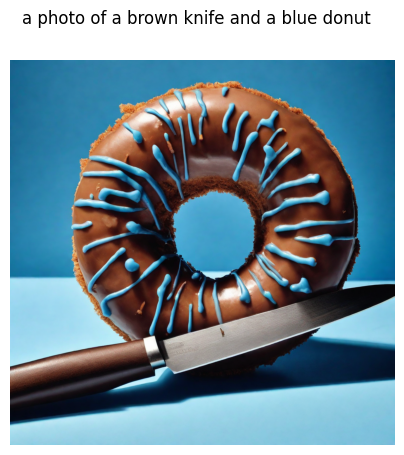

Args: {'lmbda': 2.0, 'num_particles': 4, 'adaptive_resampling': True, 'resample_frequency': 20, 'time_steps': 100, 'potential_type': 'max', 'resampling_t_start': 20, 'resampling_t_end': 50, 'guidance_reward_fn': 'ImageReward', 'use_smc': True}


  0%|          | 0/100 [00:00<?, ?it/s]

Resampling at timestep 20 with ESS: 1.4241670370101929


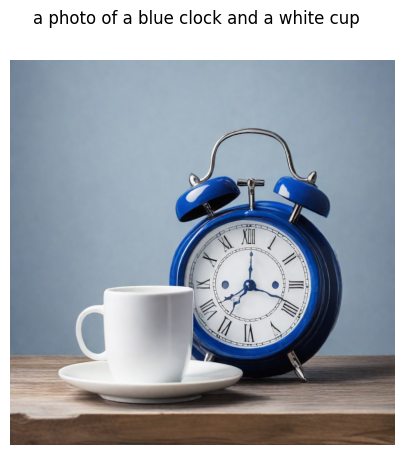

Args: {'lmbda': 2.0, 'num_particles': 4, 'adaptive_resampling': True, 'resample_frequency': 20, 'time_steps': 100, 'potential_type': 'max', 'resampling_t_start': 20, 'resampling_t_end': 50, 'guidance_reward_fn': 'ImageReward', 'use_smc': True}


  0%|          | 0/100 [00:00<?, ?it/s]

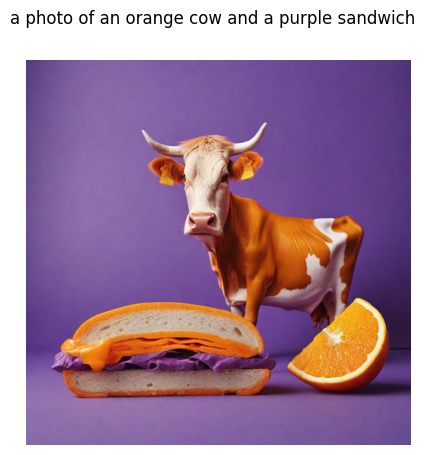

Args: {'lmbda': 2.0, 'num_particles': 4, 'adaptive_resampling': True, 'resample_frequency': 20, 'time_steps': 100, 'potential_type': 'max', 'resampling_t_start': 20, 'resampling_t_end': 50, 'guidance_reward_fn': 'ImageReward', 'use_smc': True}


  0%|          | 0/100 [00:00<?, ?it/s]

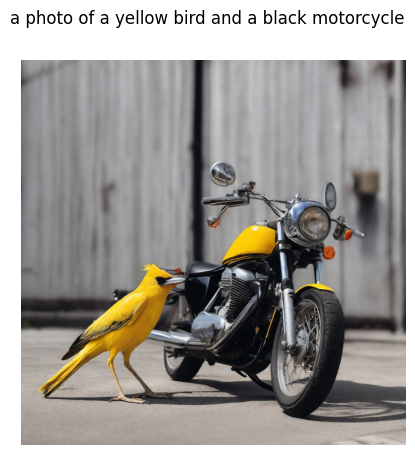

Args: {'lmbda': 2.0, 'num_particles': 4, 'adaptive_resampling': True, 'resample_frequency': 20, 'time_steps': 100, 'potential_type': 'max', 'resampling_t_start': 20, 'resampling_t_end': 50, 'guidance_reward_fn': 'ImageReward', 'use_smc': True}


  0%|          | 0/100 [00:00<?, ?it/s]

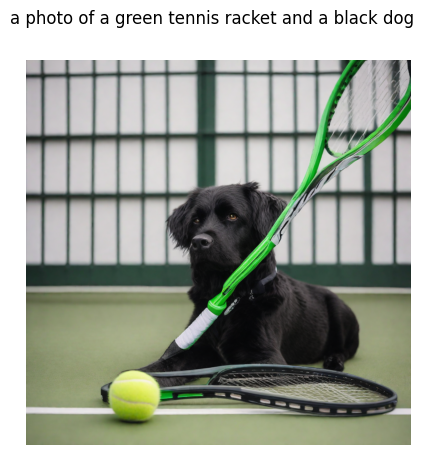

Args: {'lmbda': 2.0, 'num_particles': 4, 'adaptive_resampling': True, 'resample_frequency': 20, 'time_steps': 100, 'potential_type': 'max', 'resampling_t_start': 20, 'resampling_t_end': 50, 'guidance_reward_fn': 'ImageReward', 'use_smc': True}


  0%|          | 0/100 [00:00<?, ?it/s]

Resampling at timestep 20 with ESS: 1.781701922416687


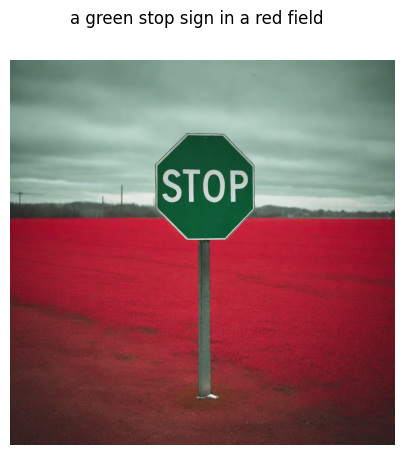

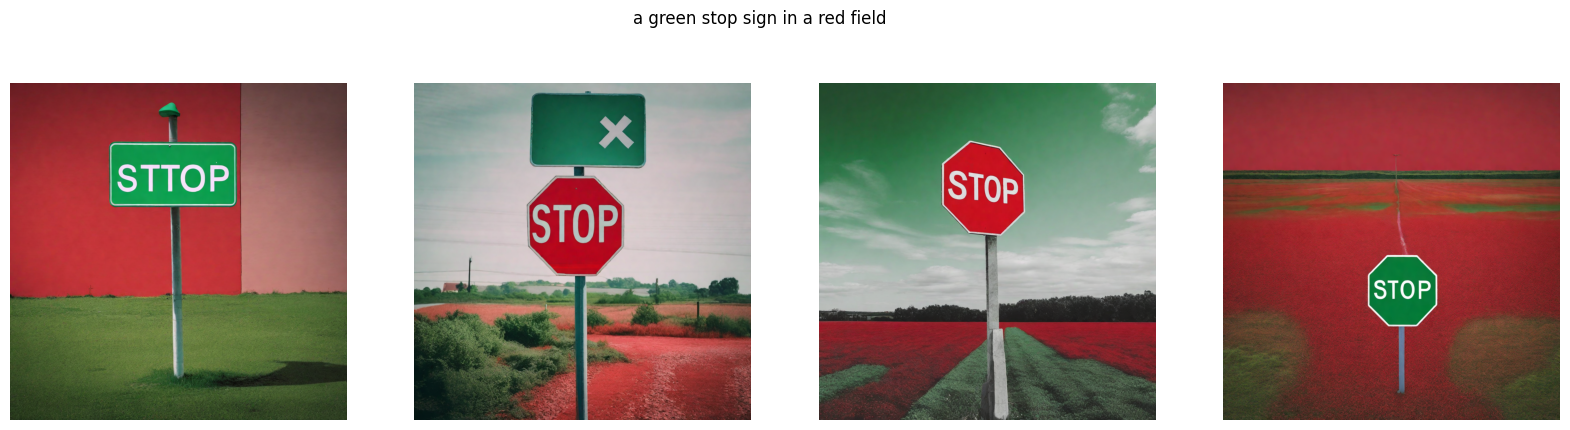

In [9]:
with open(score_path, "w") as score_f:
    for prompt_idx, item in enumerate(prompt_data):
        torch.manual_seed(0)
        torch.cuda.manual_seed(0)
        torch.cuda.manual_seed_all(0)
        
        
        prompt = [item['prompt']]*fkd_args['num_particles']
        start_time = datetime.now()
        
        images = pipeline(prompt, 
                          num_inference_steps=fkd_args["time_steps"], 
                          eta=args.eta,
                          fkd_args=fkd_args)
        end_time = datetime.now()        
        images = images[0]

        time_taken = end_time - start_time
        
        results = do_eval(prompt=prompt, images=images, metrics_to_compute=metrics_to_compute)
        guidance_reward = np.array(results["ImageReward"]["result"])
        sorted_idx = np.argsort(guidance_reward)[::-1]
        images = [images[i] for i in sorted_idx]
        
        results['time_taken'] = time_taken.total_seconds()
        results['prompt'] = prompt
        results['prompt_index'] = prompt_idx

        image_fpath = os.path.join(images_path, f"{prompt_idx}.png")
        results['image_path'] = image_fpath

        score_f.write(json.dumps(results) + "\n")
        
        if show_best_particle:
            _, ax = plt.subplots(1, 1, figsize=(5, 5))            
            ax.imshow(images[0])
            ax.axis("off")
        else:
            _, ax = plt.subplots(1, args.num_particles, figsize=(args.num_particles*5, 5))
            for i, image in enumerate(images):
                ax[i].imshow(image)
                ax[i].axis("off")
                
        plt.suptitle(prompt[0])
        plt.savefig(image_fpath)
        plt.show()
        plt.close()
